<a href="https://colab.research.google.com/github/juliachen2357/ME592/blob/main/Copy_of_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

train_Data_index=[]
train_SteerAngle=[]
train_Throttle=[]
train_Brake=[]
train_Speed=[]
train_X_Position=[]
train_Y_Position=[]
train_Pitch=[]
train_Yaw=[]
train_Roll=[]

with open('/content/drive/MyDrive/ME_592/train/robot_log.csv', newline='') as csvfile:
      spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
      for row in spamreader:
          if row[0]!='Path':
              train_Data_index.append(row[0])
              train_SteerAngle.append(float(row[1]))
              train_Throttle.append(float(row[2]))
              train_Yaw.append(float(row[8]))
test_Data_index=[]
test_SteerAngle=[]
test_Throttle=[]
test_Brake=[]
test_Speed=[]
test_X_Position=[]
test_Y_Position=[]
test_Pitch=[]
test_Yaw=[]
test_Roll=[]

with open('/content/drive/MyDrive/ME_592/test/robot_log.csv', newline='') as csvfile:
      spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
      for row in spamreader:
          if row[0]!='Path':
              test_Data_index.append(row[0])
              test_SteerAngle.append(float(row[1]))
              test_Throttle.append(float(row[2]))
              test_Yaw.append(float(row[8]))


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
hw3_x_train_len=len(os.listdir("/content/drive/MyDrive/ME_592/train/IMG2"))
hw3_x_train=np.zeros((hw3_x_train_len,180,180))
hw3_x_test_len=len(os.listdir("/content/drive/MyDrive/ME_592/test/IMG2"))
hw3_x_test=np.zeros((hw3_x_test_len,180,180))


In [5]:
from IPython.lib.display import YouTubeVideo
import os


directory = '/content/drive/MyDrive/ME_592/train/IMG2/'
i=0
for ele in train_Data_index:
  im=cv2.imread(directory+ele[-35:],0)
  hw3_x_train[i,:,:]=im
  i=i+1
print(hw3_x_train[1,:,:])

[[ 30.  35.  30. ...  13.  21.  26.]
 [ 30.  36.  33. ...  21.  28.  30.]
 [ 29.  36.  36. ...  29.  32.  28.]
 ...
 [248. 248. 248. ... 236. 237. 237.]
 [247. 247. 247. ... 235. 235. 236.]
 [246. 246. 246. ... 234. 234. 235.]]


In [6]:

directory = '/content/drive/MyDrive/ME_592/test/IMG2/'
i=0
for ele in test_Data_index:
  im=cv2.imread(directory+ele[-35:],0)
  hw3_x_test[i,:,:]=im
  i=i+1
Y_train=np.zeros((3,hw3_x_train_len))
Y_test=np.zeros((3,hw3_x_test_len)) 
Y_train[0,:]=train_SteerAngle
Y_train[1,:]=train_Throttle
Y_train[2,:]=train_Yaw

Y_test[0,:]=test_SteerAngle
Y_test[1,:]=test_Throttle
Y_test[2,:]=test_Yaw
Y_test=Y_test.T
Y_train=Y_train.T

In [7]:
train_images = hw3_x_train.reshape(hw3_x_train_len, 180, 180, 1)
test_images = hw3_x_test.reshape(hw3_x_test_len, 180, 180, 1)
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(180, 180, 1), (180, 180)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)
train_images.shape


(1545, 180, 180, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
img_rows, img_cols = 180, 180
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='relu'))
model.compile(loss='mean_squared_error',
      optimizer='adam',
      metrics=['accuracy'])
model.summary()


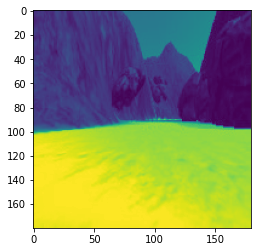

In [9]:
plt.imshow(hw3_x_train[1,:,:]*255);plt.show() 

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min')
history=model.fit(train_images, Y_train, validation_data=(test_images, Y_test),callbacks=[es], batch_size = 10, epochs = 100)


Train on 1545 samples, validate on 855 samples
Epoch 1/100
1545/1545 [==============================] - ETA: 0s - loss: 351.1941 - acc: 1.0000

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1545/1545 [==============================] - 8s 5ms/sample - loss: 351.1941 - acc: 1.0000 - val_loss: 604.6076 - val_acc: 1.0000
Epoch 2/100
1545/1545 [==============================] - 5s 3ms/sample - loss: 448.6451 - acc: 0.9994 - val_loss: 501.8687 - val_acc: 1.0000


In [22]:
print(history.history['loss'])

[351.19410367305227, 448.6450868871991]


In [23]:
test_loss, test_acc = model.evaluate(test_images, Y_test)

In [24]:
result = model.predict(test_images)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [29]:
with np.printoptions(threshold=np.inf):
    print(result)
with np.printoptions(threshold=np.inf): 
    #print(Y_test)
  #print((Y_test-result)/Y_test)
  print(np.mean(((Y_test[:,2]-result[:,2])/Y_test[:,2])))
  print(np.mean(((Y_test[:,0]-result[:,0])/(Y_test[:,0]+0.00001))))
  print(np.mean(((Y_test[:,1]-result[:,1])/(Y_test[:,1]+0.00001))))

[[  0.          0.         35.70394  ]
 [  0.          0.         35.704697 ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.704697 ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.703712 ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70416  ]
 [  0.          0.         35.704582 ]
 [  0.          0.         35.703712 ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70394  ]
 [  0.          0.         35.70461  ]
 [  0.          0.         35.83197  ]
 [  0.          0.         35.832195 ]
 [  0.          0.         35.263508 ]
 [  0.          0.       